<h1>Quiz 1 : Pemahaman ALgoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

<h2> 1. Bagaimana Process algoritma KNN? </h2?

* menentukan parameter K, bilangan bulat positif sebagai nearest neightbors (banyaknya tetangga terdekat)

* menghitung jarak antara data baru dan semua data yang ada di data training

* menentukan K tetangga terdekat berdasarkan jarak minimum

* tetangga yang memiliki frekuensi terbanyak diambil sebagai nilai prediksi atau hasil klasifikasi dari data tersebut

<h2> 2. Jelaskan minimal 2 kekurangan dari Algoritma KNN? </h2>

* algorimta ini sangatlah sensitif terhadap data pencilan (outlier)

* model dengan algorima ini akan akan kebingungan apabila data prediksi memiliki tetangga pada label a dan label b dengan jumlah tetangga yang sama (kelemahan ini dapat diakali dengan menambahkan parameter weight by distance)

<h1>Quiz 2 : Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparaeter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot ke dua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

uscore = []
for i in range(2,21):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(X_train, y_train)
    uscore.append(accuracy_score(y_test, knn.predict(X_test)))

dscore = []
for i in range(2,21):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train, y_train)
    dscore.append(accuracy_score(y_test, knn.predict(X_test)))

In [45]:
print(f'uniform score\t: {uscore}')

uniform score	: [0.6944444444444444, 0.8055555555555556, 0.7222222222222222, 0.6666666666666666, 0.6388888888888888, 0.75, 0.6388888888888888, 0.6944444444444444, 0.6944444444444444, 0.7222222222222222, 0.6388888888888888, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112]


In [46]:
print(f'distance score\t: {dscore}')

distance score	: [0.75, 0.8333333333333334, 0.7777777777777778, 0.75, 0.7222222222222222, 0.75, 0.6944444444444444, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]


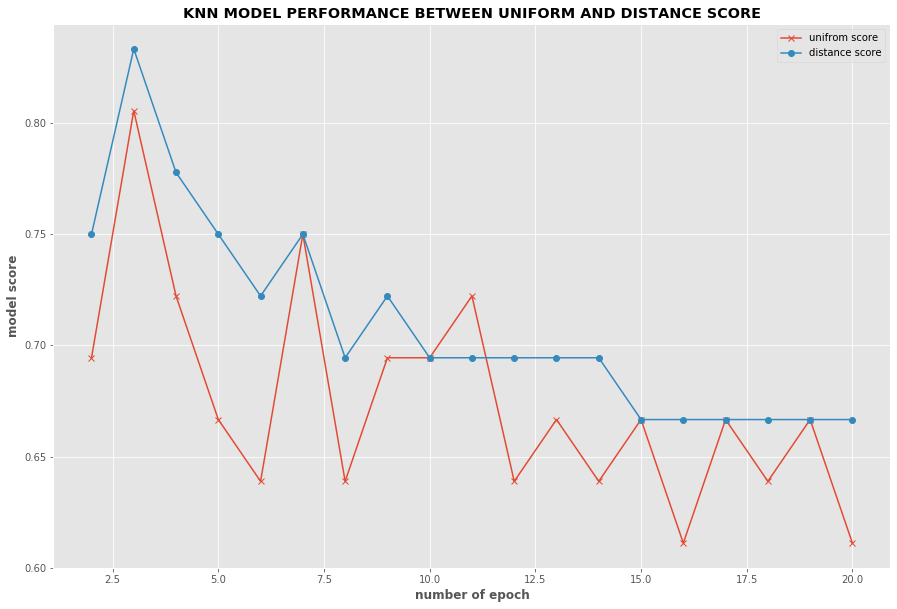

In [53]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=[15,10])
ax.plot(np.arange(2,21), uscore, marker='x', label='unifrom score')
ax.plot(np.arange(2,21), dscore, marker='o', label='distance score')
ax.set_xlabel('number of epoch', fontweight='bold')
ax.set_ylabel('model score', fontweight='bold')
ax.set_title('KNN MODEL PERFORMANCE BETWEEN UNIFORM AND DISTANCE SCORE', fontweight='bold')
ax.legend()
plt.show()

Contoh hasil yang di harapkan :

Uniform Scores -> [0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]
 
 distance scores -> [0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

![title](img/day2.png)
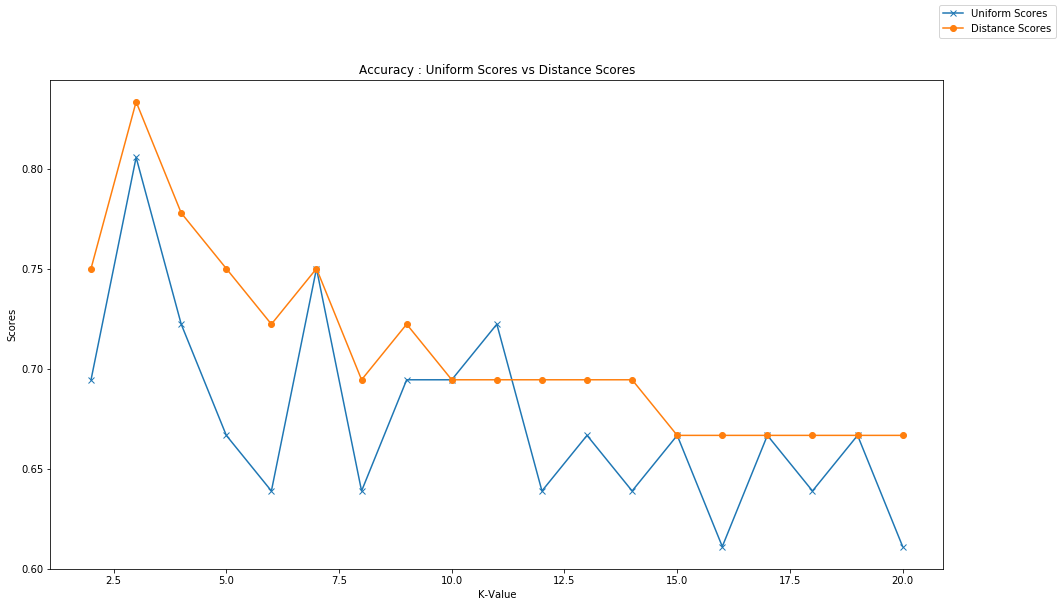

<h1>Quiz 3 : Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [86]:
import numpy as np

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()
lr.fit(X, y)
display(f'nilai coef adalah: {lr.coef_}')

display(f'nilai intercept adalah adalah: {lr.intercept_}')

'nilai coef adalah: [ 1.5 -5.   9.  10. ]'

'nilai intercept adalah adalah: 0.5000000016247697'